In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the CSV file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()


Saving breast-cancer.csv to breast-cancer.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print(df.info())
print(df.isnull().sum())

label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])  #

if 'id' in df.columns:
    df.drop(['id'], axis=1, inplace=True)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9649


In [6]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
ab_acc = accuracy_score(y_test, ab.predict(X_test))
print(f"AdaBoost Accuracy: {ab_acc:.4f}")

AdaBoost Accuracy: 0.9649


In [7]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"XGBoost Accuracy: {xgb_acc:.4f}")


XGBoost Accuracy: 0.9561


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:01:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [8]:
results = {
    "Random Forest": rf_acc,
    "AdaBoost": ab_acc,
    "XGBoost": xgb_acc
}

# Print results
for model, acc in results.items():
    print(f"{model} Accuracy: {acc:.4f}")


Random Forest Accuracy: 0.9649
AdaBoost Accuracy: 0.9649
XGBoost Accuracy: 0.9561


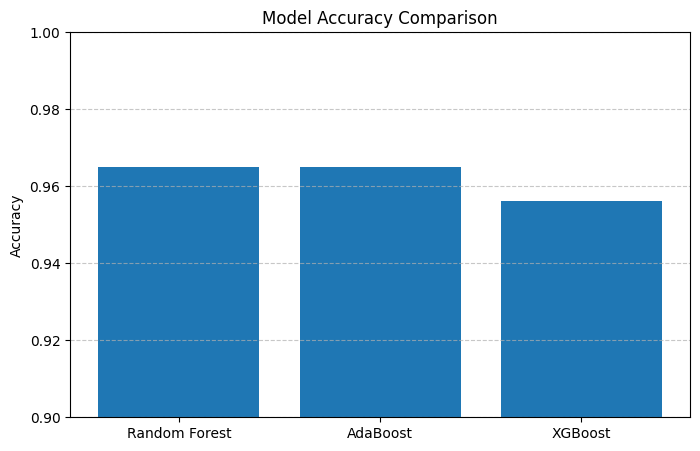

In [9]:
import matplotlib.pyplot as plt

# Accuracy results
results = {
    "Random Forest": rf_acc,
    "AdaBoost": ab_acc,
    "XGBoost": xgb_acc
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()